# Problem 1: Logistic Regression and CIFAR-10

In [2]:
import time
import pandas as pd
import numpy as np
import sklearn as skl
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, accuracy_score

In [3]:
# Use `fetch_openml` to download dataset
data = fetch_openml("CIFAR_10_small")
X_train, X_test, Y_train, Y_test = train_test_split(data['data'], data['target'].astype(int), 
                                                    test_size=0.25, random_state=42)

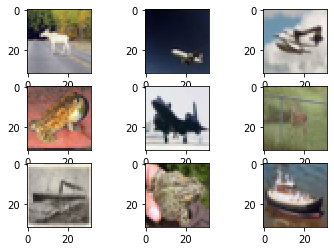

In [4]:
# Display images 
img_train = X_train.reshape(X_train.shape[0], 3, 32, 32).transpose(0,2,3,1).astype("uint8")
plt.figure()
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(img_train[i])
plt.show()

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lr_l1 = LogisticRegressionCV(cv = 5, multi_class='multinomial', scoring = 'neg_log_loss', penalty='l1', solver='saga', max_iter = 1000, tol=0.01, n_jobs=-1)
lr_l1.fit(X_train, Y_train)
print('Tuned C:  %.4f' % lr_l1.C_[0])
print('Train loss with L1 penalty: %.4f' % log_loss(Y_train, lr_l1.predict_proba(X_train)))
print('Train acc with L1 penalty: %.4f' % accuracy_score(Y_train, lr_l1.predict(X_train)))
print('Test loss with L1 penalty: %.4f' % log_loss(Y_test, lr_l1.predict_proba(X_test)))
print('Test acc with L1 penalty: %.4f' % accuracy_score(Y_test, lr_l1.predict(X_test)))
print("Sparsity with L1 penalty: %.2f%%" % (np.mean(lr_l1.coef_ ==0) * 100))

In [ ]:
lr_l2 = LogisticRegressionCV(cv = 5,multi_class='multinomial', scoring = 'neg_log_loss', penalty='l2', solver='saga', max_iter = 1000, tol=0.01, n_jobs=-1)
lr_l2.fit(X_train, Y_train)
print('Tuned C:  %.4f' % lr_l2.C_[0])
print('Train loss with L2 penalty: %.4f' % log_loss(Y_train, lr_l2.predict_proba(X_train)))
print('Train acc with L2 penalty: %.4f' % accuracy_score(Y_train, lr_l2.predict(X_train)))
print('Test loss with L2 penalty: %.4f' % log_loss(Y_test, lr_l2.predict_proba(X_test)))
print('Test acc with L2 penalty: %.4f' % accuracy_score(Y_test, lr_l2.predict(X_test)))
print("Sparsity with L2 penalty: %.2f%%" % (np.mean(lr_l2.coef_ ==0) * 100))

In [ ]:
Cs = np.linspace(1e-3,1e-2,8)
lr_l1_cs = [LogisticRegression(C=c,multi_class='multinomial',penalty='l1',solver='saga',max_iter = 1000,tol=0.01) for c in Cs]
lr_l1_cs = [lr.fit(X_train,Y_train) for lr in lr_l1_cs]
sparsity_cs = [(np.mean(lr.coef_==0)**100) for lr in lr_l1_cs]
test_acc_cs = [accuracy_score(Y_test, lr.predict(X_test)) for lr in lr_l1_cs]
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('C')
ax1.set_ylabel('Test Acc', color=color)
ax1.plot(Cs, test_acc_cs, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('sparsity %', color=color)
ax2.plot(Cs, sparsity_cs, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()